## Using Scikit-Learn Library for my FMCG Sales Analysis (Machine Learning & Predictive Modeling)


### Objectives
- Understand Scikit-Learn’s structure and modules  
- Prepare the FMCG dataset for machine learning tasks  
- Implement encoding, scaling, and splitting techniques

### Key Concepts
- **Scikit-Learn Architecture:** Estimators, Transformers, Pipelines  
- **Preprocessing:** Handling missing data, encoding, scaling  
- **Train-Test Split:** Creating training and testing subsets

##### **Importing Libraries and Loading our Dataset**

In [1]:
# Importing the libraries for Scikit-Learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the FMCG Sales Dataset

df = pd.read_csv("FMCG_2022_2024.csv")

# Display sample data
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141.0,128.0,9
1,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0.0,129.0,0
2,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118.0,161.0,8
3,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81.0,114.0,7
4,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,NaN,204.0,12


#### **Data Preprocessing with Scikit-Learn**
Before analysis, I need to ensure that the data is properly preprocessed and reliable for Modeling, Traininging, Prediction & Evaluation.

In [3]:
# Preview data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190752 non-null  float64
 12  delivered_qty    190754 non-null  float64
 13  units_sold       190757 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 20.4+ MB


In [4]:
# Encode categorical columns and keep them as object (text)

obj_cols = df.select_dtypes(include="object").columns

# Convert them to string dtype
for col in obj_cols:
    df[col] = df[col].astype("string")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  string 
 1   sku              190757 non-null  string 
 2   brand            190757 non-null  string 
 3   segment          190757 non-null  string 
 4   category         190757 non-null  string 
 5   channel          190757 non-null  string 
 6   region           190757 non-null  string 
 7   pack_type        190757 non-null  string 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190752 non-null  float64
 12  delivered_qty    190754 non-null  float64
 13  units_sold       190757 non-null  int64  
dtypes: float64(3), int64(3), string(8)
memory usage: 20.4 MB


In [5]:
# Checking for Missing Values (Null Cells)
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    5
delivered_qty      3
units_sold         0
dtype: int64

In [6]:
# Handle Missing Values

imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

In [7]:

# Convert only specific columns if needed

float_cols = df.select_dtypes(include="float64").columns


for col in float_cols:
    if col != "price_unit":  # keep price_unit as float
        df[col] = df[col].astype("int64")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  string 
 1   sku              190757 non-null  string 
 2   brand            190757 non-null  string 
 3   segment          190757 non-null  string 
 4   category         190757 non-null  string 
 5   channel          190757 non-null  string 
 6   region           190757 non-null  string 
 7   pack_type        190757 non-null  string 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), string(8)
memory usage: 20.4 MB


In [8]:
# Converting the Date Column

df['date'] = pd.to_datetime(df['date'])

# Extract useful date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[ns]
 1   sku              190757 non-null  string        
 2   brand            190757 non-null  string        
 3   segment          190757 non-null  string        
 4   category         190757 non-null  string        
 5   channel          190757 non-null  string        
 6   region           190757 non-null  string        
 7   pack_type        190757 non-null  string        
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  int64         
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190757 non-null  int64         
 12  delivered_qty    190757 non-null  int64         
 13  units_sold       190757 non-null  int64         
 14  year             190

In [9]:
# Identifying Numerical, date & Categorical Columns

numeric_cols = [
    'price_unit', 'delivery_days', 'stock_available',
    'delivered_qty'
]

categorical_cols = [
    'sku', 'brand', 'segment', 'category', 'channel',
    'region', 'pack_type', 'promotion_flag'
]

date_cols = ['year','month','day']


In [10]:
# One-Hot Encode categorical columns

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_data = ohe.fit_transform(df[categorical_cols])

ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(), index=df.index)


In [11]:
# Define Features & Target

# Using units_sold as the target for prediction.

X = df.drop(columns=['units_sold', 'date'])
y = df['units_sold']

In [12]:
# Build full feature matrix

X = pd.concat([df[numeric_cols], df[date_cols], ohe_df], axis=1)
y = df['units_sold']


In [13]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((152605, 80), (38152, 80))

In [14]:
# Scale Numerical Columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

##### **After Preprocessing the data**
You now have:
- Clean data  
- Encoded features  
- Scaled inputs  
- Training & testing sets  


#### **Model Training, Prediction & Evaluation**

Model training is the process of feeding a machine-learning algorithm with the training data so it can learn patterns and relationships.
The model adjusts its internal parameters using the training examples to minimize error.

In [15]:
# Train Models
# I will try two contrasting learners:
# Linear Regression (simple, interpretable)
# Random Forest Regressor (strong, flexible)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
# Train Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

pred_lr = lin_reg.predict(X_test_scaled)

In [17]:
# Train Random Forest

forest = RandomForestRegressor(
    n_estimators=80,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
forest.fit(X_train_scaled, y_train)

pred_forest = forest.predict(X_test_scaled)

mse_forest = mean_squared_error(y_test, pred_forest)
r2_forest = r2_score(y_test, pred_forest)

print("Random Forest MSE:", mse_forest)
print("Random Forest R²:", r2_forest)


Random Forest MSE: 33.05903376388534
Random Forest R²: 0.7622739392778783


In [18]:
# Linear Regression evaluation
print("Linear Regression")
print("R² Score:", round(r2_score(y_test, pred_lr), 3))
print("MAE:", round(mean_absolute_error(y_test, pred_lr), 3))
print("MSE:", round(mean_squared_error(y_test, pred_lr), 3))


# Random Forest evaluation
print("\n Random Forest Regressor")
print("R² Score:", round(r2_score(y_test, pred_forest), 3))
print("MAE:", round(mean_absolute_error(y_test, pred_forest), 3))
print("MSE:", round(mean_squared_error(y_test, pred_forest), 3))



Linear Regression
R² Score: 0.637
MAE: 5.046
MSE: 50.539

 Random Forest Regressor
R² Score: 0.762
MAE: 3.963
MSE: 33.059


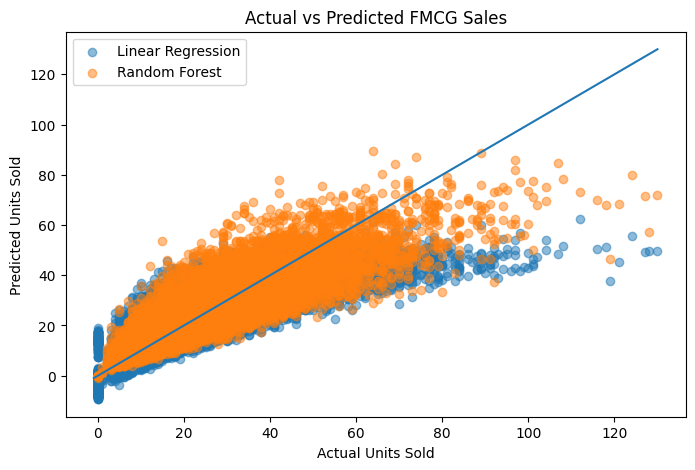

In [19]:
# Visualize Predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Scatter plots
plt.scatter(y_test, pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, pred_forest, alpha=0.5, label="Random Forest")

# Perfect prediction reference line
max_val = max(y_test.max(), pred_forest.max())
min_val = min(y_test.min(), pred_forest.min())
plt.plot([min_val, max_val], [min_val, max_val])

# Labels and title
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted FMCG Sales")
plt.legend()

plt.show()



In [20]:
# Feature Importance (Random Forest)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': forest.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df.head(10)

,feature,importance
2,stock_available,0.462343
78,promotion_flag_0,0.175510
79,promotion_flag_1,0.136174
5,month,0.081227
68,category_Yogurt,0.044249
4,year,0.014474
66,category_ReadyMeal,0.010072
0,price_unit,0.010017
3,delivered_qty,0.009197
6,day,0.007327


#####  **What I have Built**
- A full preprocessing pipeline  
- Two machine learning models  
- Prediction accuracy evaluation  
- Feature importance ranking  
- Visualization of model behavior  

I have now walked from raw FMCG data → machine learning insights.  
